## Подключение библиотек для работы с CSV и графиками.

In [209]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [296]:
# Словарь настроек.

dic = [
    "TYPE_TEST",
    "SAMPLING_FREQUENCY",
    "SAMPLING_FREQUENCY_SPEED",
    "ACCELERATION_FREE_THROW",
    "HORISONTAL_DIFFERENCE_BETWEEN_CANNONS",
    "VERTICAL_DIFFERENCE_VETWEEN_CANNONS",
    "VERTICAL_SPEED_AD",
    "HORISONTAL_SPEED_AD",
    "VERTICAL_SPEED_OF",
    "HORISONTAL_SPEED_OF",
    "V_MIN",
    "V_MAX",
]

In [211]:
# Функции по изменению и чтению конфигурации.

def SetUpSet (s,k):
    with open ('config.txt', 'r') as f:
      old_data = f.read()
    inds = old_data.find(s)
    indf = old_data.find(s) + len(s)
    while old_data[indf] != '\n':
        indf += 1;
    new_data = old_data.replace(old_data[inds:indf],s + "=" + str(k)) 
    with open ('config.txt', 'w') as f:
        f.write(new_data)
        
def KnowSet(s):
    with open ('config.txt', 'r') as f:
      old_data = f.read()
    inds = old_data.find(s)
    indf = old_data.find(s) + len(s)
    while old_data[indf] != '\n':
        indf += 1;
    s = old_data[inds:indf]
    return float(s[s.find('=') + 1:])


In [233]:
# Запуск изменений конфигураций.

def start(x):
    with open ('config.txt', 'r') as f:
      data = f.read()
    print(data)
    print()
    for i in range(x):
        print("Введите номер команды:", end = ' ')
        n = int(input())
        if n == 13:
            for i in dic:
                print(i,'=')
                k = float(input())
                SetUpSet(i,k)
        else:
            s = dic[n - 1]
            print(s,'=', end = ' ')
            k = float(input())
            SetUpSet(s,k)
    print()
    with open ('config.txt', 'r') as f:
      data = f.read()
    os.system("clear")
    print(data)
    

In [305]:
#Построение графиков на основе выбронного типа исследования.

def GetGraph():
    type = KnowSet(dic[0])

    if type == 1:
        s = 'Find_hit_settings'
    else:
        s = 'Try_hit_settings'

    with open(s + '/report.txt', 'r') as f:
        n = int(f.readline())
        for i in range(n):
            print("Координаты вектора скорости",i + 1,"решения:",str(f.readline()))
    
    k = n//2

    plt.rcParams ['figure.figsize'] = [10, 6]

    for i in range(n):
    
        file = s + '/file' + str(i) + '.csv'
        many_factors = pd.read_csv(file)

        plt.subplot(k + 1, 2, i + 1)

        sns.lineplot(x = many_factors['A'], y = many_factors['B'])
        sns.lineplot(x = many_factors['C'], y = many_factors['D'])



# Настройка.

### Управление изменением конфигурационного файла:

> Управление конфигурационным файлом выполняется по следующему алгоритму:
>
> * выбор номера команды из ниже представленного списка
> * изменения значения

### Список команд:

1. Изменить тип теста (0 - тест заданных значений, 1 - поиск параметров успешной защиты);
1. Изменить частоту дискритизации;
1. Изменить частоту дискритизации в поиске скоростей;
1. Изменить ускорение свободного падения;
1. Изменить горизонтальное рассояние между пушками;
1. Изменить вертикальное рассояние между пушками;
1. Изменить вертикальную скорость обороны;
1. Изменить горизонтальную скорость обороны;
1. Изменить вертикальную скорость атаки;
1. Изменить горизонтальную скорость атаки;
1. Минимальная скорость (возможны отрицательные значения);
1. Максимальная скорость;
1. Изменить все значения.

In [311]:
# ИЗМЕНЕНИЕ КОНФИГУРАЦИИ!!!
print("Введите ко-во команд:", end= ' ')
start(int(input()))

Введите ко-во команд: 1
SAMPLING_FREQUENCY=0.1
ACCELERATION_FREE_THROW=9.8
HORISONTAL_DIFFERENCE_BETWEEN_CANNONS=10.0
VERTICAL_DIFFERENCE_VETWEEN_CANNONS=0.0
VERTICAL_SPEED_AD=4
HORISONTAL_SPEED_AD=7
VERTICAL_SPEED_OF=-20.0
HORISONTAL_SPEED_OF=5.0
TYPE_TEST=1.0
SAMPLING_FREQUENCY_SPEED=0.1
V_MIN=-10.0
V_MAX=10

Введите номер команды: 1
TYPE_TEST = 0

SAMPLING_FREQUENCY=0.1
ACCELERATION_FREE_THROW=9.8
HORISONTAL_DIFFERENCE_BETWEEN_CANNONS=10.0
VERTICAL_DIFFERENCE_VETWEEN_CANNONS=0.0
VERTICAL_SPEED_AD=4
HORISONTAL_SPEED_AD=7
VERTICAL_SPEED_OF=-20.0
HORISONTAL_SPEED_OF=5.0
TYPE_TEST=0.0
SAMPLING_FREQUENCY_SPEED=0.1
V_MIN=-10.0
V_MAX=10


## Сборка и запуск C++ кода.

Строки этого блока могут отличатся в зависимости от способа сборки.

In [312]:
!rd .\Find_hit_settings\ /s /q
!rd .\Try_hit_settings\ /s /q
!mkdir Find_hit_settings
!mkdir Try_hit_settings
!"D:\CLion 2022.2.3\bin\cmake\win\bin\cmake.exe" -DCMAKE_BUILD_TYPE=Debug "-DCMAKE_MAKE_PROGRAM=D:/CLion 2022.2.3/bin/ninja/win/ninja.exe" -G Ninja -S D:\CLionProjects\Munchausen -B D:\CLionProjects\Munchausen\cmake-build-debug
!"D:\CLion 2022.2.3\bin\cmake\win\bin\cmake.exe" --build D:\CLionProjects\Munchausen\cmake-build-debug --target AD -j 6
!D:\CLionProjects\Munchausen\AD.exe -static -static-libgcc -static-libstdc++ -g -static-libgcc -static-libstdc++

-- Configuring done
-- Generating done
-- Build files have been written to: D:/CLionProjects/Munchausen/cmake-build-debug
ninja: no work to do.


# Вывод графиков.

* ### Голубая линия - Защита.
* ### Оранжевая линия - Атака.

Координаты вектора скорости 1 решения: 4.000000,7.000000


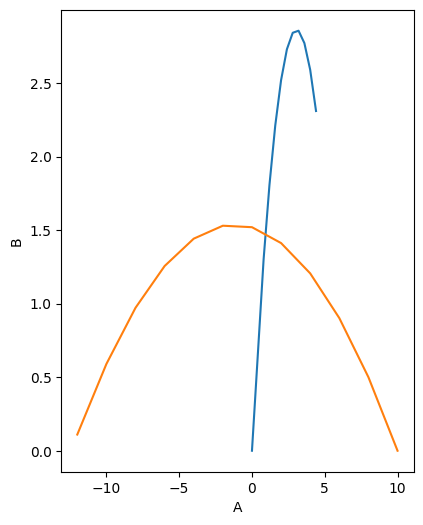

In [313]:
GetGraph()